In [123]:
!pip install catboost > None

In [124]:
!pip install shap > None

In [125]:
import shap

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [127]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [128]:
from catboost import CatBoostRegressor

In [129]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [130]:
from sklearn.metrics import make_scorer #для создания авторских метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
df = pd.read_csv(r'C:\Users\Ксения\Project\Megy\Cleaning_and_visualization\O_nan1111.csv')

In [133]:
category_list = ['Spehricity', 'Crystalline', 'Space group']
for i in category_list:
  df[i] = df[i].astype('category')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Area/volume                                    568 non-null    float64 
 1   Max/min(size)                                  568 non-null    float64 
 2   org_coating_HAcceptors                         568 non-null    float64 
 3   org_coating_LogP                               568 non-null    float64 
 4   common_spin                                    568 non-null    float64 
 5   Effective anisotropy constant (J/m3)           568 non-null    float64 
 6   magnetic anisotropy constant (J/m3)            568 non-null    float64 
 7   magnetocrystalline anisotropy constant (J/m3)  568 non-null    float64 
 8   Anisotropy constant                            568 non-null    float64 
 9   Crystalline                                

# Модели и сравнение

In [135]:
X = df.drop('Saturation_magnetization', axis=1)  #Без целевой переменной
y = df['Saturation_magnetization']  #Целевая переменная

KeyError: "['Saturation_magnetization'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Модели
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42),
    AdaBoostRegressor(n_estimators=100, random_state=42),
    BaggingRegressor(n_estimators=100, random_state=42),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor(max_iter=500)]

In [ ]:
# Сохраняем результаты в список
results = []

# Нужно оценить каждую модель
for model in models:
    model.fit(X_train, y_train)  # Указываем категориальный признак
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model.__class__.__name__,
        'MSE': mse,
        'RMSE': np.sqrt(mse),
        'R2': r2
    })

In [ ]:
df_results = pd.DataFrame(results)
print(df_results)

                        Model       MSE      RMSE        R2
0            LinearRegression  1.221606  1.105263  0.188116
1                       Ridge  1.250908  1.118440  0.168641
2                       Lasso  1.504695  1.226660 -0.000026
3                  ElasticNet  1.504695  1.226660 -0.000026
4       RandomForestRegressor  0.840194  0.916621  0.441604
5   GradientBoostingRegressor  0.907574  0.952667  0.396822
6           AdaBoostRegressor  1.075233  1.036935  0.285395
7            BaggingRegressor  0.842401  0.917824  0.440137
8                         SVR  1.085269  1.041762  0.278726
9         KNeighborsRegressor  0.954890  0.977185  0.365376
10               MLPRegressor  0.692330  0.832064  0.539874


C:\Users\Ксения\AppData\Local\Temp\ipykernel_25220\2909450855.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')
C:\Users\Ксения\AppData\Local\Temp\ipykernel_25220\2909450855.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_results['Model'], rotation=45, ha='right')
C:\Users\Ксения\AppData\Local\Temp\ipykernel_25220\2909450855.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(df_results['Model'], rotation=45, ha='right')


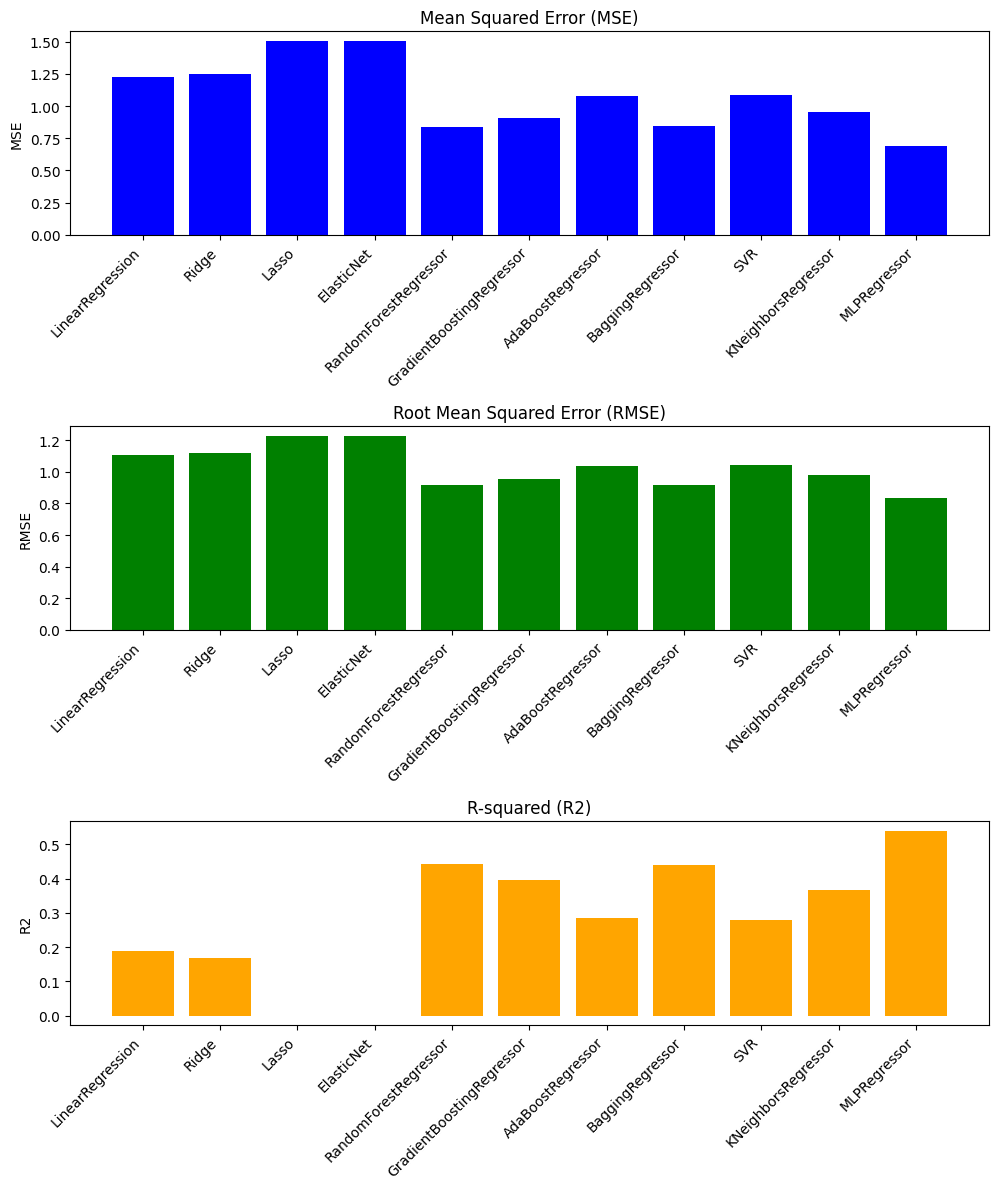

In [ ]:
# Создаем фигуру и оси для графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# График среднеквадратичной ошибки (MSE)
ax1.bar(df_results['Model'], df_results['MSE'], color='blue')
ax1.set_title('Mean Squared Error (MSE)')
ax1.set_ylabel('MSE')
ax1.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# График корня из среднеквадратичной ошибки (RMSE)
ax2.bar(df_results['Model'], df_results['RMSE'], color='green')
ax2.set_title('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('RMSE')
ax2.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# График коэффициента детерминации (R2)
ax3.bar(df_results['Model'], df_results['R2'], color='orange')
ax3.set_title('R-squared (R2)')
ax3.set_ylabel('R2')
ax3.set_xticklabels(df_results['Model'], rotation=45, ha='right')

# Регулируем расположение графиков
plt.tight_layout()

# Показываем графики
plt.show()

# Кроссвалидация RandomForest

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Создаем объект RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Выполняем кросс-валидацию
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores = np.sqrt(-cv_scores)

# Выводим результаты кросс-валидации
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

# Получаем предсказанные значения с помощью кросс-валидации
predicted_values = cross_val_predict(rf_model, X_train, y_train, cv=10)

# Выводим предсказанные значения и фактические значения для сравнения
for predicted, actual in zip(predicted_values, y_train):
    print(f"Predicted: {predicted}, Actual: {actual}")

Cross-Validation RMSE Scores: [0.66585029 0.46257136 0.45838696 0.37590292 0.42581045 0.24571226
 0.49277356 0.3669432  0.40890044 0.27244401]
Mean RMSE: 0.41752954593064795
Predicted: -0.2719999999999995, Actual: -0.272
Predicted: 0.574260000000001, Actual: 0.627
Predicted: 1.171999999999998, Actual: 1.172
Predicted: -0.4047600000000003, Actual: -0.388
Predicted: -0.2719999999999995, Actual: -0.272
Predicted: -1.39702, Actual: -1.421
Predicted: -0.2719999999999995, Actual: -0.272
Predicted: 0.12335959595959595, Actual: -2.369
Predicted: -0.2455564852369852, Actual: -0.151
Predicted: 0.4859999999999993, Actual: 0.486
Predicted: -0.2071109999999998, Actual: 1.876
Predicted: -0.5249500000000004, Actual: -0.584
Predicted: -0.08903267650232248, Actual: -0.272
Predicted: -0.021562782828282834, Actual: 0.444
Predicted: 1.534000000000001, Actual: 1.534
Predicted: -0.6348800000000009, Actual: -0.633
Predicted: -0.0579999999999999, Actual: -0.058
Predicted: 1.171999999999998, Actual: 1.172
Pred

In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем пространство поиска гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем объект RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Выводим оптимальные гиперпараметры
print("Best Parameters:", grid_search.best_params_)

# Получаем лучшую модель
best_rf_model = grid_search.best_estimator_

# Пересчитываем кросс-валидацию с использованием лучших параметров
cv_scores_optimized = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Before Optimization:
Cross-Validation RMSE Scores: [0.66585029 0.46257136 0.45838696 0.37590292 0.42581045 0.24571226
 0.49277356 0.3669432  0.40890044 0.27244401]
Mean RMSE: 0.41752954593064795

After Optimization:
Cross-Validation RMSE Scores: [0.66609591 0.46162439 0.45210529 0.37641572 0.43080016 0.249222
 0.48406557 0.36787095 0.40685178 0.27097932]
Mean RMSE: 0.416603108214299


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Создаем объект RandomForestRegressor с оптимальными гиперпараметрами
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Выполняем кросс-валидацию
cv_scores_optimized = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))


Before Optimization:
Cross-Validation RMSE Scores: [0.66585029 0.46257136 0.45838696 0.37590292 0.42581045 0.24571226
 0.49277356 0.3669432  0.40890044 0.27244401]
Mean RMSE: 0.41752954593064795

After Optimization:
Cross-Validation RMSE Scores: [0.57784162 0.43750013 0.43056939 0.42056293 0.474376  ]
Mean RMSE: 0.46817001169389344


In [ ]:
# Обучаем оптимизированную модель
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# Assuming you have an optimized RandomForest model named 'best_rf_model'
best_rf_model.fit(X_train, y_train)  # Fit the model on the entire training set

# Making predictions on the training data
y_pred_train_optimized = best_rf_model.predict(X_train)

# Create a DataFrame to store the predicted values along with their corresponding indices
predicted_df = pd.DataFrame({'Index': X_train.index, 'Actual': y_train, 'Predicted': y_pred_train_optimized})

# Output the DataFrame with predicted values and their corresponding indices
print(predicted_df)

     Index  Actual  Predicted
140    140  -0.272  -0.269755
89      89   0.627   0.597680
310    310   1.172   1.172000
499    499  -0.388  -0.407586
155    155  -0.272  -0.269755
..     ...     ...        ...
71      71   0.663   0.616130
106    106  -0.789  -0.609415
270    270   0.486   0.486000
435    435   0.155   0.008792
102    102   2.215   1.855625

[444 rows x 3 columns]


In [ ]:
# Making predictions on the test data
y_pred_test_optimized = best_rf_model.predict(X_test)

# Create DataFrames to store the actual and predicted values along with their corresponding indices
actual_predicted_df = pd.DataFrame({'Index': X_test.index, 'Actual': y_test, 'Predicted': y_pred_test_optimized})

# Output the DataFrame with actual and predicted values and their corresponding indices
print(actual_predicted_df)

     Index  Actual  Predicted
231    231   0.284   0.266938
374    374  -0.935  -0.776873
55      55  -0.058  -0.058106
381    381  -1.199  -1.088711
70      70   0.663   0.616130
..     ...     ...        ...
11      11  -0.038  -0.091126
281    281   0.486   0.486000
22      22  -0.151  -0.234333
375    375  -5.199  -0.750692
477    477   1.930  -0.978867

[111 rows x 3 columns]


In [ ]:
sat_df = pd.read_csv(r'C:\Users\Ксения\Project\Megy\content\sat_data_.csv')

In [ ]:
# Слияние датафреймов по условию равенства значений в колонках 'log' и 'original'
merged_df = actual_predicted_df.merge(sat_df, left_on='Predicted', right_on='log', suffixes=('_predicted', '_original'))

# Фильтрация строк, где значения 'log' и 'Predicted' совпадают
matched_rows = merged_df[merged_df['log'] == merged_df['Predicted']]

# Вывод соответствующих пар значений
print(matched_rows[['original', 'Predicted']])

Empty DataFrame
Columns: [original, Predicted]
Index: []


## Визуализации предсказаний RandomForest


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Создаем объект RandomForestRegressor с оптимальными гиперпараметрами
best_rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Выполняем кросс-валидацию
cv_scores_optimized = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))


Before Optimization:
Cross-Validation RMSE Scores: [0.66585029 0.46257136 0.45838696 0.37590292 0.42581045 0.24571226
 0.49277356 0.3669432  0.40890044 0.27244401]
Mean RMSE: 0.41752954593064795

After Optimization:
Cross-Validation RMSE Scores: [0.57784162 0.43750013 0.43056939 0.42056293 0.474376  ]
Mean RMSE: 0.46817001169389344


ValueError: operands could not be broadcast together with shapes (111,) (5,) 

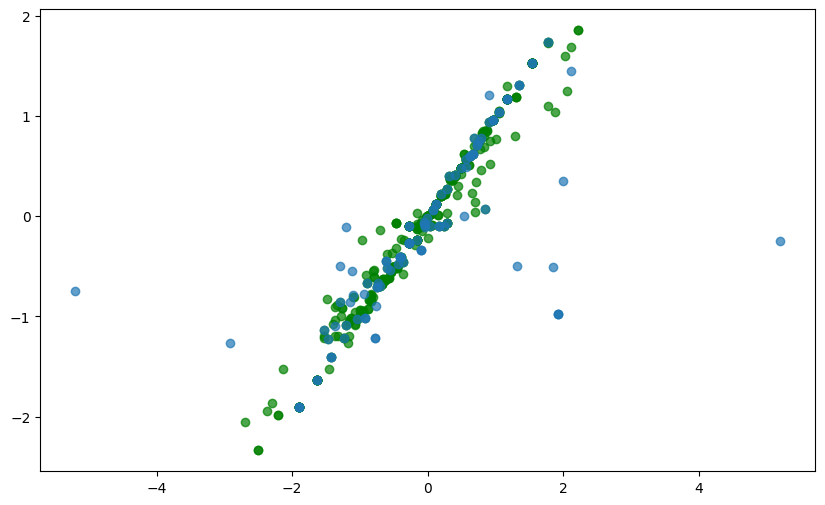

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_pred_train_optimized, label='Optimized RandomForest Train', alpha=0.7, color='green')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_optimized, label='Optimized RandomForest Test', alpha=0.7)

# Scatter plot for test data with RMSE bounds
lower_bound_rf = np.sort(y_test - cv_rmse_scores_optimized)
upper_bound_rf = np.sort(y_test + cv_rmse_scores_optimized)
plt.fill_between(np.sort(y_test), lower_bound_rf, upper_bound_rf, color='blue', alpha=0.2, label='RMSE Bounds')

# Ideal prediction line
plt.plot(y_test_pred_optimized, y_test_pred_optimized, label='Perfect Prediction', linestyle='--', color='red', alpha=0.7)

# Text with metrics in the upper-left corner of the plot
text_optimized = f'Optimized RF MSE: {mse_optimized:.4f}, RMSE: {cv_rmse_scores_optimized:.4f}, R2: {r2_optimized:.4f}'
plt.text(0.015, 0.78, text_optimized, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

# Display the plot
plt.title('Scatter Plot RandomForestRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Кроссвалидация Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Создаем базовую модель (например, DecisionTreeRegressor)
base_model = DecisionTreeRegressor()

# Создаем объект BaggingRegressor
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Выполняем кросс-валидацию
cv_scores = cross_val_score(bagging_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores = np.sqrt(-cv_scores)

# Выводим результаты кросс-валидации
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

Cross-Validation RMSE Scores: [0.01721733 0.01184476 0.02081566 0.01890296 0.01047116 0.01404021
 0.01811946 0.01455495 0.0142086  0.01713075]
Mean RMSE: 0.01573058366316683


In [ ]:
from sklearn.model_selection import GridSearchCV

# Определяем пространство поиска гиперпараметров
param_grid = {
    'n_estimators': [50, 100, 200],
    'base_estimator__max_depth': [None, 10, 20],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]
}
base_model = DecisionTreeRegressor()

# Создаем объект BaggingRegressor
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Создаем объект GridSearchCV
grid_search = GridSearchCV(bagging_model, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем поиск по сетке
grid_search.fit(X_train, y_train)

# Выводим оптимальные гиперпараметры
print("Best Parameters:", grid_search.best_params_)

# Получаем лучшую модель
best_bagging_model = grid_search.best_estimator_

# Пересчитываем кросс-валидацию с использованием лучших параметров
cv_scores_optimized = cross_val_score(best_bagging_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Преобразуем отрицательные значения MSE в положительные
cv_rmse_scores_optimized = np.sqrt(-cv_scores_optimized)

# Выводим результаты кросс-валидации до и после оптимизации
print("\nBefore Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

print("\nAfter Optimization:")
print("Cross-Validation RMSE Scores:", cv_rmse_scores_optimized)
print("Mean RMSE:", np.mean(cv_rmse_scores_optimized))

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
# Обучаем оптимизированную модель
best_bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=200,
                 random_state=42)

In [ ]:
best_bagging_model.fit(X_train, y_train)  # Fit the model on the entire training set

# Making predictions on the training data
y_pred_train_optimized_bag = best_bagging_model.predict(X_train)

In [ ]:
# Получение предсказаний для тестовой выборки
y_test_pred_optimized_bag = best_bagging_model.predict(X_test)

# Расчет метрик для оптимизированной модели
mse_optimized_bag = mean_squared_error(y_test, y_test_pred_optimized_bag)
rmse_optimized_bag = np.sqrt(mse_optimized)
r2_optimized_bag = r2_score(y_test, y_test_pred_optimized_bag)

## Визуализации предсказаний Bagging

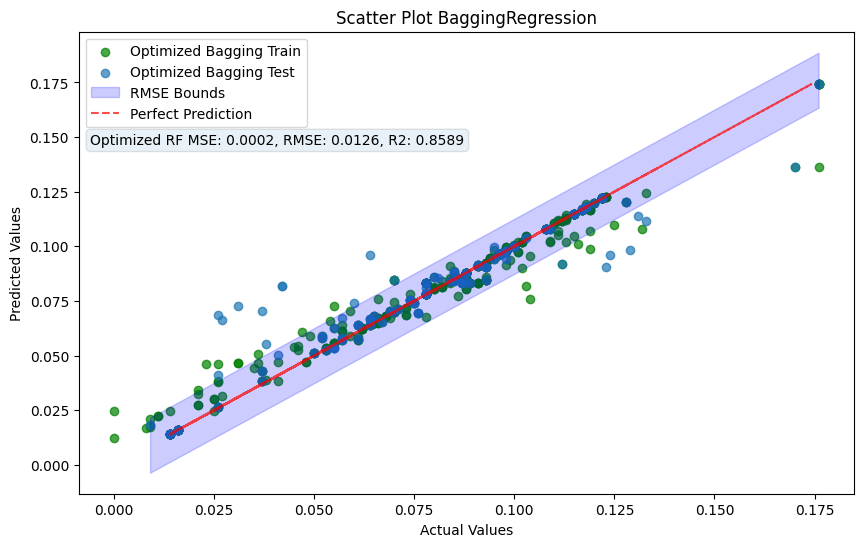

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(y_train, y_pred_train_optimized_bag, label='Optimized Bagging Train', alpha=0.7, color='green')

# Scatter plot for test data
plt.scatter(y_test, y_test_pred_optimized_bag, label='Optimized Bagging Test', alpha=0.7)

# Scatter plot for test data with RMSE bounds
lower_bound_rf = np.sort(y_test - rmse_optimized_bag)
upper_bound_rf = np.sort(y_test + rmse_optimized_bag)
plt.fill_between(np.sort(y_test), lower_bound_rf, upper_bound_rf, color='blue', alpha=0.2, label='RMSE Bounds')

# Ideal prediction line
plt.plot(y_test_pred_optimized_bag, y_test_pred_optimized_bag, label='Perfect Prediction', linestyle='--', color='red', alpha=0.7)

# Text with metrics in the upper-left corner of the plot
text_optimized = f'Optimized RF MSE: {mse_optimized_bag:.4f}, RMSE: {rmse_optimized_bag:.4f}, R2: {r2_optimized_bag:.4f}'
plt.text(0.015, 0.78, text_optimized, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))

# Display the plot
plt.title('Scatter Plot BaggingRegression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Визуализации SHAP

  0%|          | 0/109 [00:00<?, ?it/s]

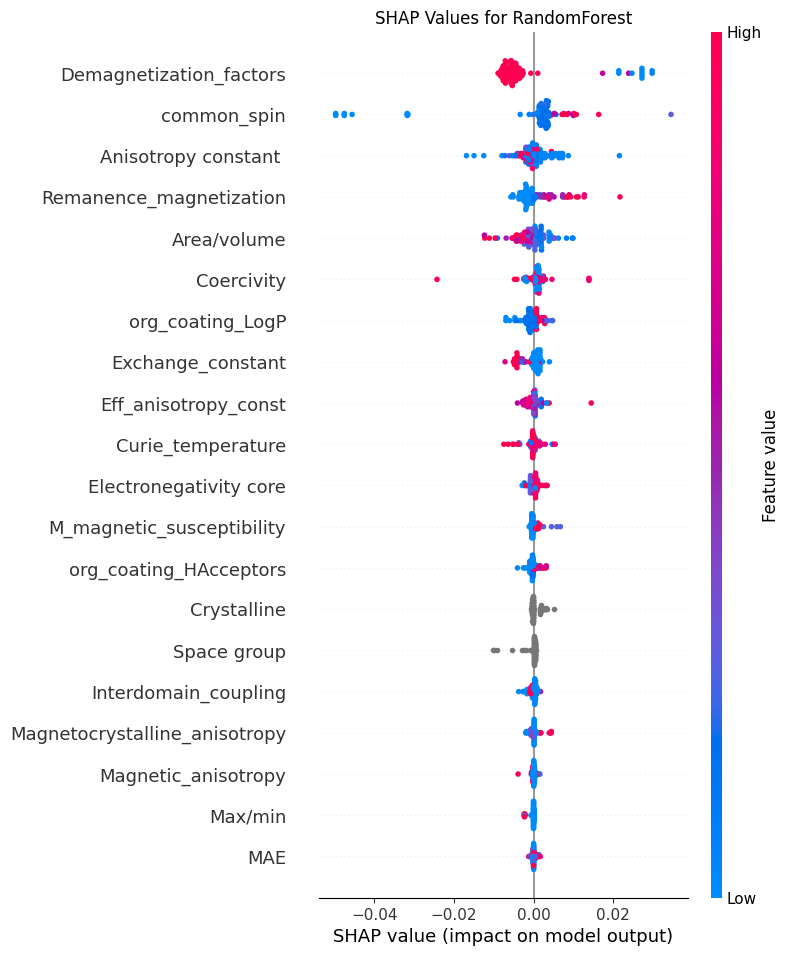

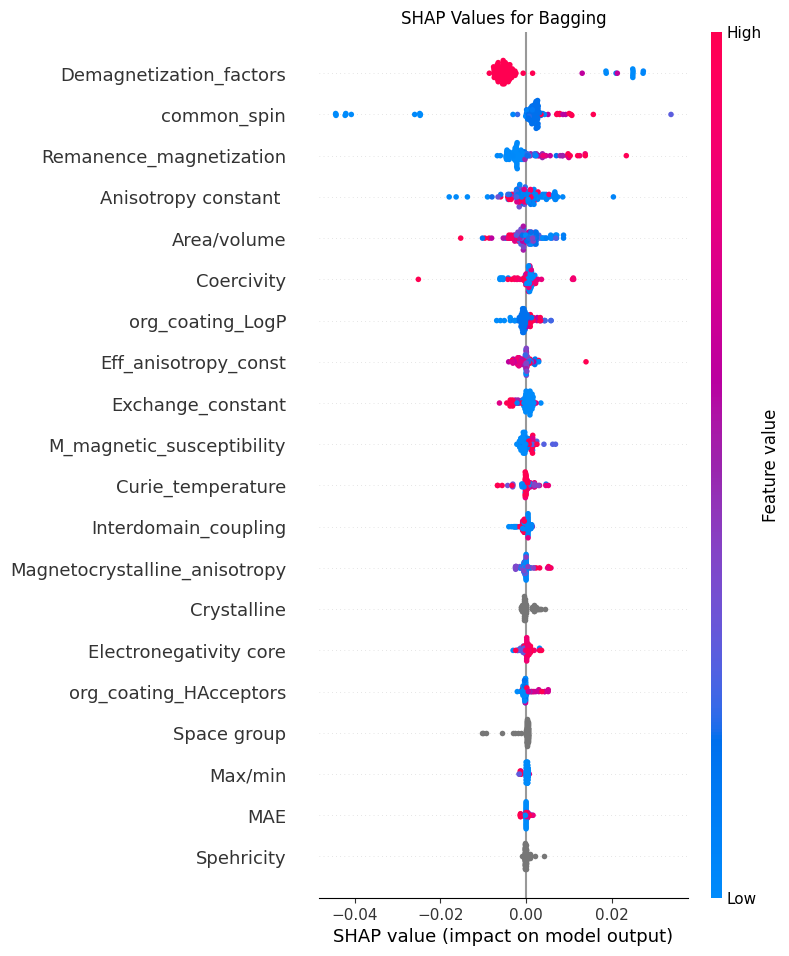

In [ ]:
import shap

# Создание explainer'ов
rf_explainer = shap.TreeExplainer(best_rf_model)

# Вместо TreeExplainer для Bagging используем KernelExplainer
bagging_explainer = shap.KernelExplainer(best_bagging_model.predict, X_train)

# Расчет SHAP-значений для тестового набора данных
shap_values_rf = rf_explainer.shap_values(X_test)
shap_values_bagging = bagging_explainer.shap_values(X_test)

# Построение SHAP-диаграммы для RandomForest
shap.summary_plot(shap_values_rf, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Values for RandomForest')
plt.show()

# Построение SHAP-диаграммы для Bagging
shap.summary_plot(shap_values_bagging, X_test, feature_names=X_test.columns, show=False)
plt.title('SHAP Values for Bagging')
plt.show()